# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import ttest_ind_from_stats
from numpy.random import seed
medical = pd.read_csv('data/insurance2.csv')

In [3]:
medical.shape

(1338, 8)

In [4]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

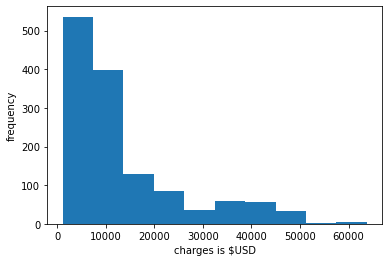

In [7]:
plt.hist(medical.charges)
plt.xlabel('charges is $USD')
plt.ylabel('frequency');

In [8]:
charges_mean = np.mean(medical.charges)
charges_mean

13270.422265141257

In [9]:
charges_std = np.std(medical.charges)
charges_std

12105.484975561605

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__\
The sample is likely large enough for us to believe that it is representative of all charges. We have no idea about the shape of the population's distribution, but the Central Limit Theorum tells us that our sample data will be nonetheless normally distributed. We need to calculate the population mean and standard deviation from our sample data and then find our confidence levels.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ \
We will use a two-sided interval, since we are concerned with data towards both tails.

In [10]:
# Estimate the population mean
epmean = np.mean(medical.charges)
epmean

13270.422265141257

In [11]:
# Estimate the population standard deviation
epstd = np.std(medical.charges, ddof=1)
epstd

12110.011236693994

In [16]:
# two tailed confidence level (A 95% significance level has a 5% alpha; splitting the 5% 
# alpha across both tails returns 2.5%. Taking 2.5% from 100% returns 97.5% as an input for 
# the significance level.)
cl = norm.ppf(0.975, loc=0, scale=1)
cl

1.959963984540054

In [25]:
# Calculate the (95%) margin of error
me = cl*epstd/np.sqrt(medical.charges.shape[0])
me

648.880286912097

In [27]:
# Calculate the 95% Confidence Interval of the mean
print("confidence interval for sample mean of {:.2f} is ({:.2f},{:.2f})".format(epmean,epmean-me,epmean+me))


confidence interval for sample mean of 13270.42 is (12621.54,13919.30)


Our confidence interval stays above the 12K threshold that the administrator is concerned about, so they can rest assured.

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ \
Our null hypothesis, $H_{O}$, is that people with insurance are charged the same (ie, the underlying means are the same). The alternative hypothesis, $H_{1}$ is that people with insurance are charged a different amount to those without. We are assuming that the underlying population variances are equal.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [33]:
# claims with insurance
w_insurance = medical[medical.insuranceclaim == 1]['charges']
# claims without insurance
wo_insurance = medical[medical.insuranceclaim == 0]['charges']

In [62]:
H0_ssize = w_insurance.shape[0]
H0_smean = np.mean(w_insurance)
H0_sstd = np.std(w_insurance)
print('H0 sample size={}, \nH0 sample mean={}, \nH0 sample standard deviation={}'.format(H0_ssize,H0_smean,H0_sstd))
H1_ssize = wo_insurance.shape[0]
H1_smean = np.mean(wo_insurance)
H1_sstd = np.std(wo_insurance)
print('H1 sample size={}, \nH1 sample mean={}, \nH1 sample standard deviation={}'.format(H1_ssize,H1_smean,H1_sstd))


H0 sample size=783, 
H0 sample mean=16423.928276537663, 
H0 sample standard deviation=14036.956250260411
H1 sample size=555, 
H1 sample mean=8821.421892306294, 
H1 sample standard deviation=6440.699841605233


\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

In [67]:
# calculate pooled standard dev
sp = np.sqrt(((H0_ssize - 1)*H0_sstd**2 + (H1_ssize - 1)*H1_sstd**2)/(H0_ssize + H1_ssize -2))
sp 

11512.282899205744

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

In [70]:
# calculate test statistic (numerator is diff in means, denominator is standard error of difference)
t = (H0_smean - H1_smean)/ (sp*np.sqrt(1/H0_ssize + 1/H1_ssize))
t

11.901306943555385

In [78]:
# lets verify using scipy
t_check,p = ttest_ind_from_stats(H0_smean, H0_sstd, H0_ssize, H1_smean, H1_sstd, H1_ssize)
assert round(t_check, 3) == round(t, 3)

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__\
No, there is no equivalent z-test function. A z-test depends upon the assumption that the distribution of sample means will be normal, but that only happens if either the population being sampled from is normal or we have a large amount of data and the Central Limit Theory comes into play and our sample distribution is normal. The t-test relates how the averages of 2 sets of data differ from each other when the standard deviation or variance is not given

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test